British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.                     
                                                                                                                                 Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.                                                                                                                                                                                                                                                                                                                   

This project is focused on scraping and collecting customer reviews from a website(Skytrax) and analysing the data to present insights that can drive key business decisions.                 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from bs4 import BeautifulSoup
import requests

In [26]:
df = pd.DataFrame(columns = ['Review_title', 'Details', 'Review'])

In [27]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100


for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    print(url)
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    parsed_content = BeautifulSoup(response.content, "html.parser")
    data_content = parsed_content.find_all("div", class_="body")
    for data in data_content:
        text_header = data.find("h2", class_ = "text_header").get_text()
        text_details = data.find("h3", class_="text_sub_header userStatusWrapper").get_text()
        text_reviews = data.find("div", class_= "text_content").get_text()
        length = len(df)
        df.loc[length, 'Review_title'] = text_header
        df.loc[length, 'Details'] = text_details
        df.loc[length, 'Review'] = text_reviews
        print(f"--->{len(df)} total reviews")

Scraping page 1
https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100
Scraping page 2
https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100
Scraping page 3
https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=100
Scraping page 4
https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=100
Scraping page 5
https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100
Scraping page 6
https://www.airlinequality.com/airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=100
Scraping page 7
https://www.airlinequality.com/airline-reviews/british-airways/page/7/?sortby=post_date%3ADesc&pagesize=100
Scraping page 8
https://www.airlinequality.com/airline-reviews/british-airways/page/8/?sortby=post_date%3ADesc&pagesize=100
Scraping

In [28]:
df

,Review_title,Details,Review
0,"""reflect a downward trend of the airline""",\n\nC Barton (United Kingdom) 28th October 2023,✅ Trip Verified | London Heathrow to Gibralta...
1,"""One of my better flights""",\n\nM Davidson (United States) 24th October 2023,✅ Trip Verified | First time flying British Ai...
2,"""I would still recommend BA""",\n\nMichael Gardiner (United Kingdom) 23rd Oct...,Not Verified | I flew London to Cairo and ret...
3,"""the worst experience ever""",\n\nTerry Anderson (United States) 22nd Octobe...,Not Verified | Absolutely the worst experienc...
4,"""an exceptional crew member""",\n\nPhilip Thompson (United Kingdom) 22nd Octo...,Not Verified | Flew back from Malta after sc...
...,...,...,...
1995,"""seat was very uncomfortable""",\n\nGeoff Williams (South Africa) 9th November...,✅ Verified Review | Scheduled to fly out of J...
1996,"""service was second to none""",\n\nG Crowther (United Kingdom) 9th November 2016,✅ Verified Review | London to Los Angeles. In...
1997,"""Goodbye British Airways""",\n\nC Drake (United Kingdom) 8th November 2016,✅ Verified Review | London Gatwick to Mauriti...
1998,"""getting worse and worse""",\n\n10 reviews\n\n\n\nA Douas (Greece) 8th Nov...,✅ Verified Review | Athens to London Heathrow...


Now we have the dataset for this task! The loops above collected 2000 reviews by iterating through the paginated pages on the website.

The next thing is data cleaning to remove any unnecessary text from each of the rows.

In [29]:
df['Review'] = df['Review'].str.split("|", n= 1, expand = True)[1]
df

,Review_title,Details,Review
0,"""reflect a downward trend of the airline""",\n\nC Barton (United Kingdom) 28th October 2023,London Heathrow to Gibraltar on 24th October...
1,"""One of my better flights""",\n\nM Davidson (United States) 24th October 2023,First time flying British Airways and I would...
2,"""I would still recommend BA""",\n\nMichael Gardiner (United Kingdom) 23rd Oct...,I flew London to Cairo and return in October...
3,"""the worst experience ever""",\n\nTerry Anderson (United States) 22nd Octobe...,Absolutely the worst experience ever. Flew ...
4,"""an exceptional crew member""",\n\nPhilip Thompson (United Kingdom) 22nd Octo...,Flew back from Malta after scattering our s...
...,...,...,...
1995,"""seat was very uncomfortable""",\n\nGeoff Williams (South Africa) 9th November...,Scheduled to fly out of Johannesburg on BA o...
1996,"""service was second to none""",\n\nG Crowther (United Kingdom) 9th November 2016,London to Los Angeles. Initially late boardi...
1997,"""Goodbye British Airways""",\n\nC Drake (United Kingdom) 8th November 2016,London Gatwick to Mauritius return. Our outb...
1998,"""getting worse and worse""",\n\n10 reviews\n\n\n\nA Douas (Greece) 8th Nov...,Athens to London Heathrow in economy Class. ...


In [30]:
df.to_csv("BA_reviews.csv")

# Using Sentimental Analysis to provide some insights into the content of the reviews

Sentiment Analysis can unconver some insights from this data. Sentiment Analysis is used to determine the emotional tone or sentiment expressed in a text. It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is positive, negative, or neutral.

In [31]:
sentiment_analysis_df = df[['Review']]

In [33]:
sentiment_analysis_df

,Review
0,London Heathrow to Gibraltar on 24th October...
1,First time flying British Airways and I would...
2,I flew London to Cairo and return in October...
3,Absolutely the worst experience ever. Flew ...
4,Flew back from Malta after scattering our s...
...,...
1995,Scheduled to fly out of Johannesburg on BA o...
1996,London to Los Angeles. Initially late boardi...
1997,London Gatwick to Mauritius return. Our outb...
1998,Athens to London Heathrow in economy Class. ...


In [34]:
# Sentiment Analysis using textblob
from textblob import TextBlob

In [36]:
# Using Sentiment Analysis to get the polarity of the Reviews
for review_data in sentiment_analysis_df['Review']:
    review_text_blob = sentiment_analysis_df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    review_text_blob

In [37]:
sentiment_analysis_df['Sentiment'] = review_text_blob
sentiment_analysis_df

C:\Users\Oreoluwa\AppData\Local\Temp\ipykernel_7332\480662376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_analysis_df['Sentiment'] = review_text_blob


,Review,Sentiment
0,London Heathrow to Gibraltar on 24th October...,0.076515
1,First time flying British Airways and I would...,0.448942
2,I flew London to Cairo and return in October...,0.279167
3,Absolutely the worst experience ever. Flew ...,0.008690
4,Flew back from Malta after scattering our s...,0.264583
...,...,...
1995,Scheduled to fly out of Johannesburg on BA o...,0.110185
1996,London to Los Angeles. Initially late boardi...,0.224074
1997,London Gatwick to Mauritius return. Our outb...,0.013659
1998,Athens to London Heathrow in economy Class. ...,0.075000


In [38]:
sentiment_analysis_df['Sentiment_type'] = sentiment_analysis_df['Sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,Review,Sentiment,Sentiment_type
0,London Heathrow to Gibraltar on 24th October...,0.076515,positive
1,First time flying British Airways and I would...,0.448942,positive
2,I flew London to Cairo and return in October...,0.279167,positive
3,Absolutely the worst experience ever. Flew ...,0.008690,positive
4,Flew back from Malta after scattering our s...,0.264583,positive
...,...,...,...
1995,Scheduled to fly out of Johannesburg on BA o...,0.110185,positive
1996,London to Los Angeles. Initially late boardi...,0.224074,positive
1997,London Gatwick to Mauritius return. Our outb...,0.013659,positive
1998,Athens to London Heathrow in economy Class. ...,0.075000,positive


In [39]:
sentiment_type_count = sentiment_analysis_df['Sentiment_type'].value_counts()
sentiment_type_count = sentiment_type_count.to_frame()
sentiment_type_count.columns = ['Sentiment Type Count']
sentiment_type_count

,Sentiment Type Count
positive,1284
negative,674
neutral,42


In [40]:
sentiment_type_percentage = sentiment_analysis_df['Sentiment_type'].value_counts(normalize = True)*100
sentiment_type_percentage = sentiment_type_percentage.to_frame()
sentiment_type_percentage.columns = ['Sentiment Type Percentage']
sentiment_type_percentage

,Sentiment Type Percentage
positive,64.2
negative,33.7
neutral,2.1


In [41]:
# create the table
Sentiment_type_grouping = pd.concat([sentiment_type_count, sentiment_type_percentage], axis = 1)
Sentiment_type_grouping.to_excel(r"C:\Users\Oreoluwa\Downloads\Sentiment Type grouping.xlsx")
Sentiment_type_grouping

,Sentiment Type Count,Sentiment Type Percentage
positive,1284,64.2
negative,674,33.7
neutral,42,2.1


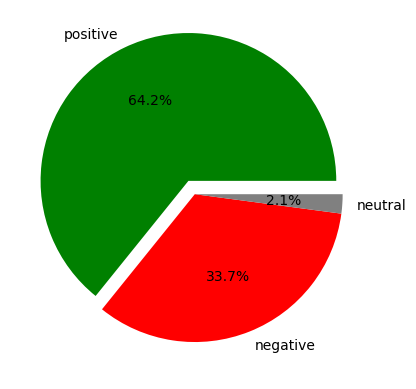

In [42]:
# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    Sentiment_type_grouping['Sentiment Type Percentage'],
    labels=Sentiment_type_grouping.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )
plt.savefig(r"C:\Users\Oreoluwa\Downloads\Sentiment Type grouping.png")
plt.show()

# Sentiment

Out of 2000 reviews collected, 64.1% were positive, 33.1% were negative and 2.8% were neutral. This means more than half of the reviews collected were polarised as positive.

# Using Wordcloud to show the key topics within the review

Word cloud can be used to retrieve the frequency of each word within the text.

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

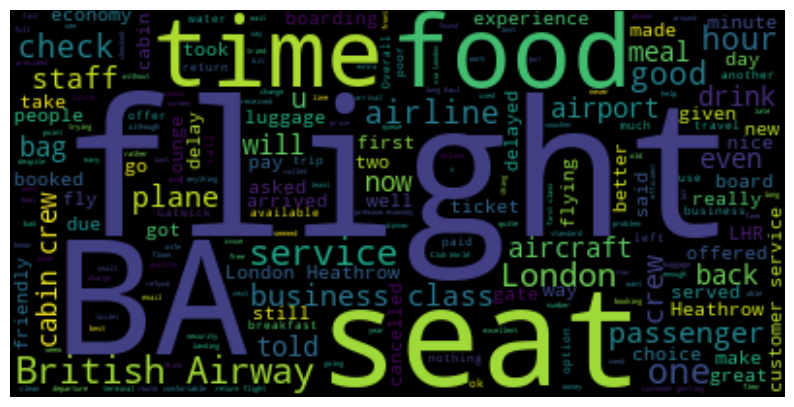

In [44]:
text = " ".join(str(i) for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"C:\Users\Oreoluwa\Downloads\BA_wordcloud.png")
plt.show()

# Key topics

The wordcloud shows the key topics within the reviews which include "flight", "BA", "seat" and "food". This shows that people are actively talking about their experiences with British Airways (BA) flight, seat and food.

# Recommendation

Online rating by customers can be included specifically for each key topics. This data gives a general insight on the performance of these key topics and can help guide in making decisions for improvement.